
age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable

percentile = this percent of group lies below yours.
                    for eg :- if cp is 25 percentile for 1 then we will say rest of the data lies in 25 percentile except the data that contains 1.

#### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### READ DATASET

In [2]:
heart = pd.read_csv('heart.csv')

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### EXPLORE THE DATASET

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### There are no null values present in the dataset

In [5]:
heart.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
heart.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

###### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='age', ylabel='Count'>

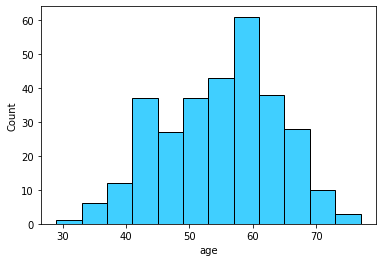

In [7]:
sns.histplot(x='age',data=heart,color='deepskyblue')

<AxesSubplot:xlabel='cp', ylabel='Count'>

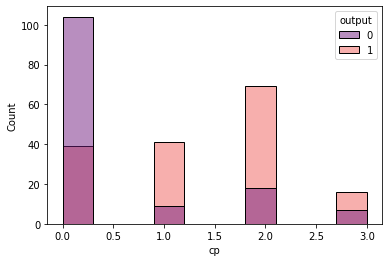

In [8]:
sns.histplot(x='cp',data=heart,hue = 'output',palette='magma')

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

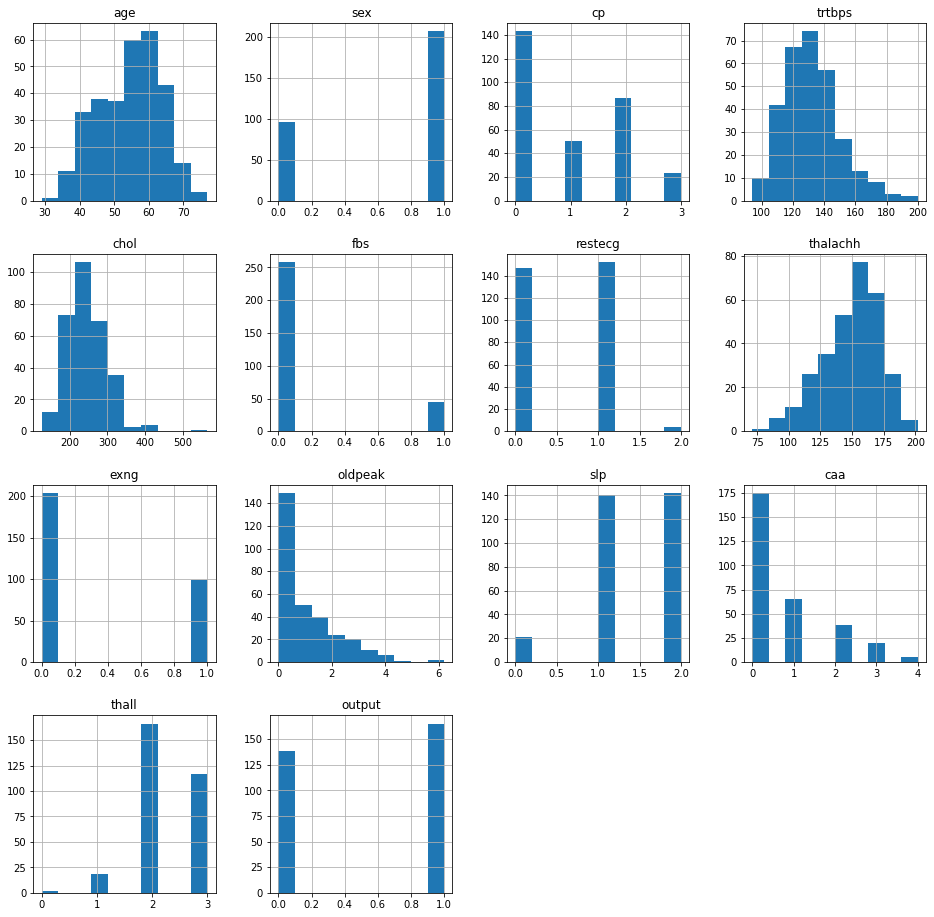

In [9]:
heart.hist(figsize=(16,16))

Univariate analysis of individual variables

##### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='age', ylabel='chol'>

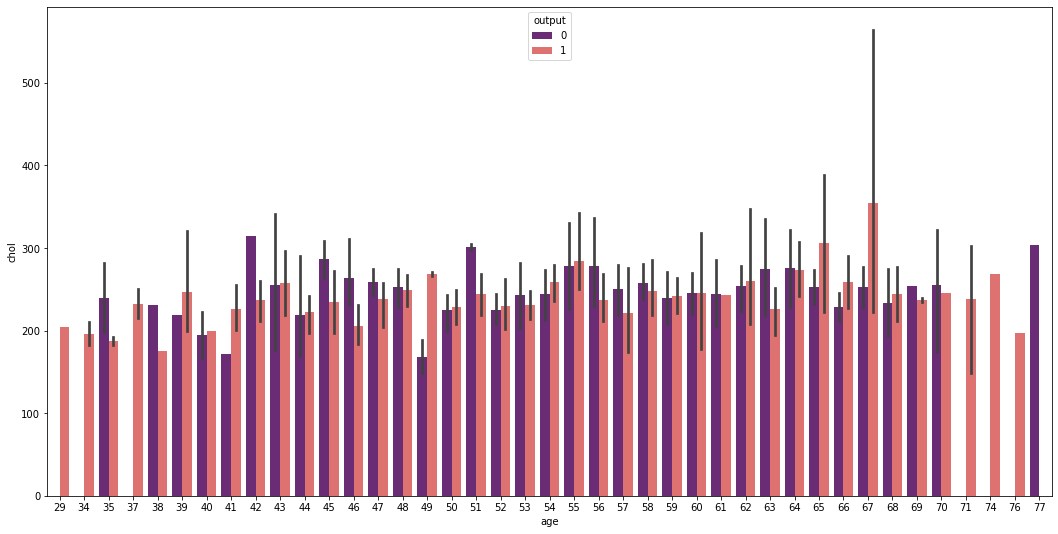

In [78]:
plt.figure(figsize=(18,9))
sns.barplot(x='age',y='chol',data=heart,hue='output',palette='b')

<AxesSubplot:xlabel='age', ylabel='exng'>

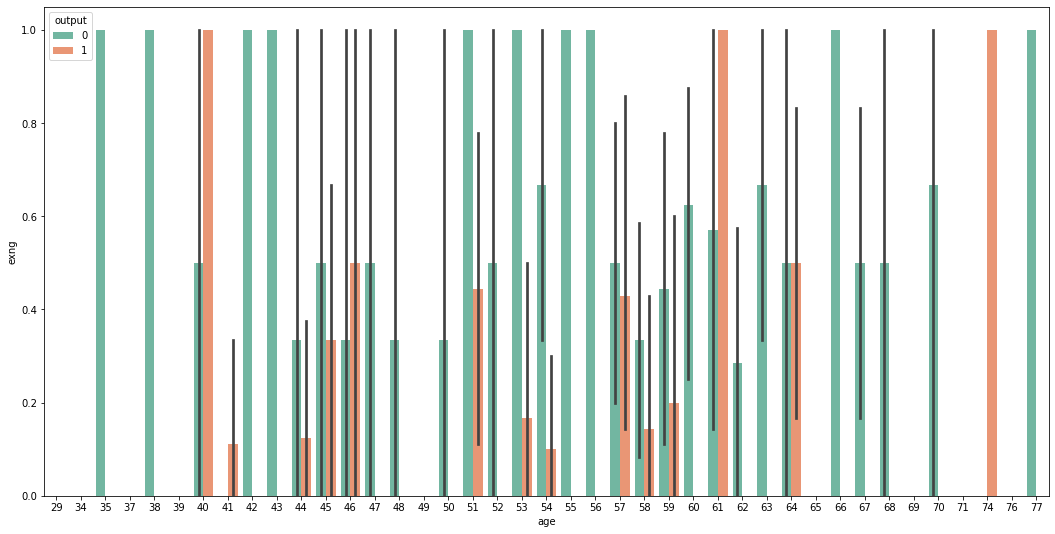

In [11]:
plt.figure(figsize=(18,9))
sns.barplot(x='age',y='exng',data=heart,hue='output',palette='Set2')

<AxesSubplot:xlabel='sex', ylabel='thall'>

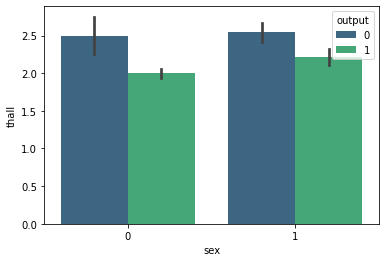

In [12]:
sns.barplot(x='sex',y='thall',data=heart,hue='output',palette='viridis')

hall: Thalium Stress Test result ~ (0,3)

<AxesSubplot:xlabel='sex', ylabel='thall'>

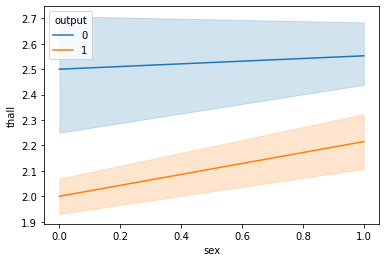

In [84]:
sns.lineplot(x='sex',y='thall',data=heart,hue='output')

<AxesSubplot:xlabel='age', ylabel='thall'>

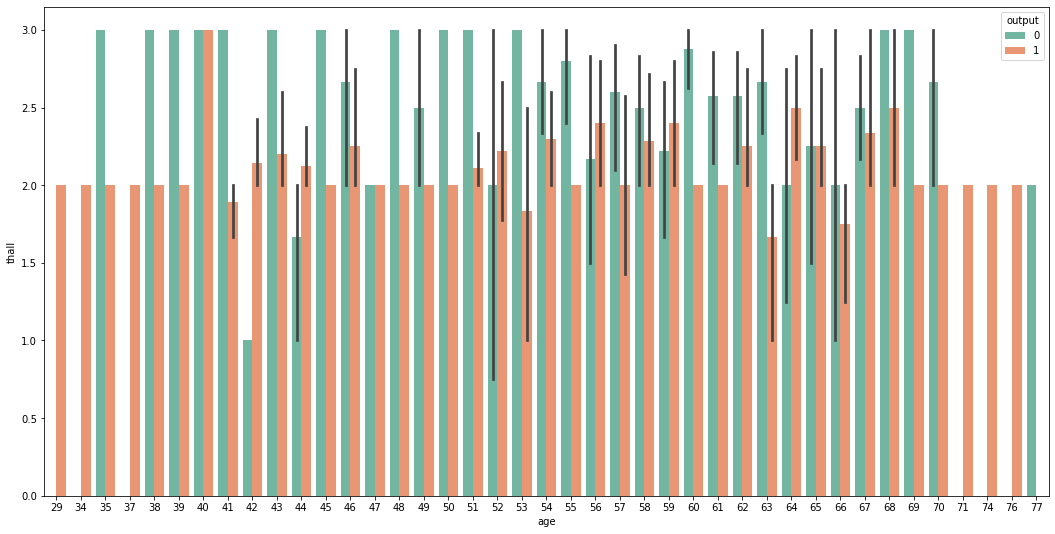

In [85]:
plt.figure(figsize=(18,9))
sns.barplot(x='age',y='thall',data=heart,hue='output',palette='Set2')

In [15]:
heart['thall'].values

array([1, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3,
       3, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2,
       1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 0, 1, 3, 3, 3,
       2, 2, 3, 3, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 3,

In [16]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

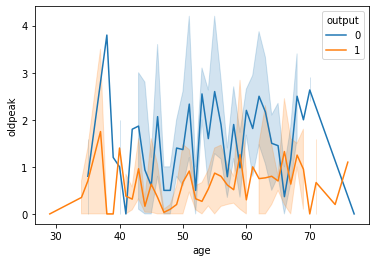

In [17]:
sns.lineplot(x='age',y='oldpeak',data=heart,hue='output')

<AxesSubplot:xlabel='age', ylabel='thalachh'>

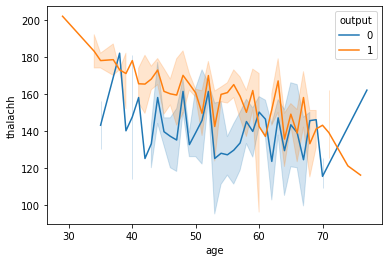

In [18]:
sns.lineplot(x='age',y='thalachh',data=heart,hue='output')

<AxesSubplot:xlabel='age', ylabel='restecg'>

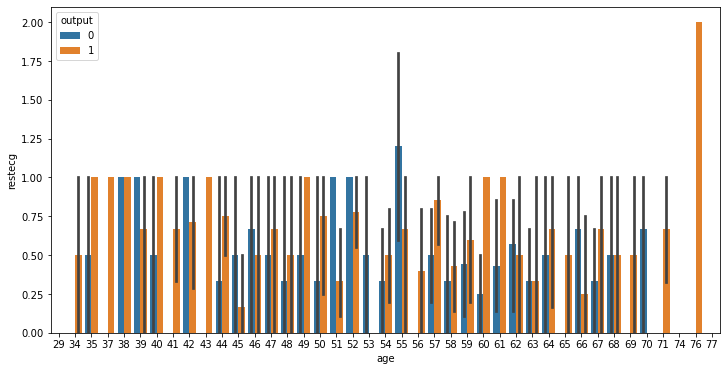

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='restecg',data=heart,hue='output')

Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

<AxesSubplot:xlabel='fbs', ylabel='Count'>

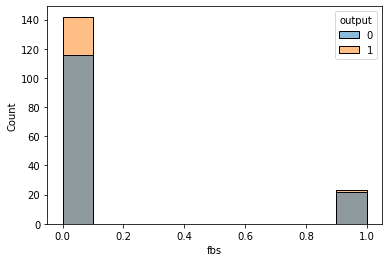

In [20]:
sns.histplot(x='fbs',data=heart,hue='output')

In [21]:
trbps_values = heart['trtbps'].values
palette = 'plasma'
bins=3

<AxesSubplot:ylabel='Count'>

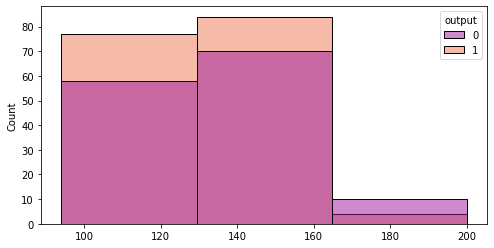

In [90]:
plt.figure(figsize=(8,4))
sns.histplot(x=trbps_values,data=heart,hue='output',palette=palette,bins=3)

<AxesSubplot:xlabel='age', ylabel='trtbps'>

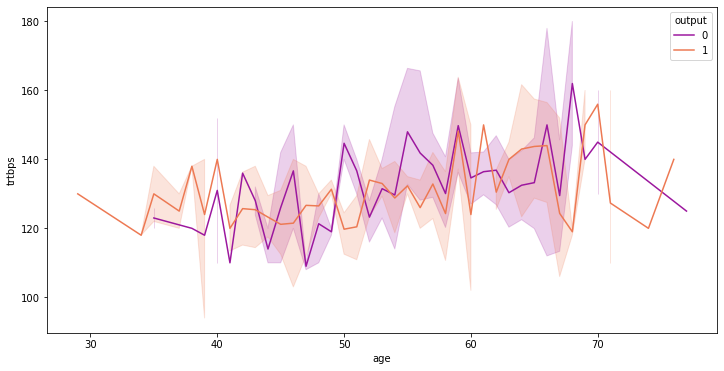

In [93]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='trtbps',data=heart,hue='output',palette='plasma')

MULTIVARIATE ANALYSIS

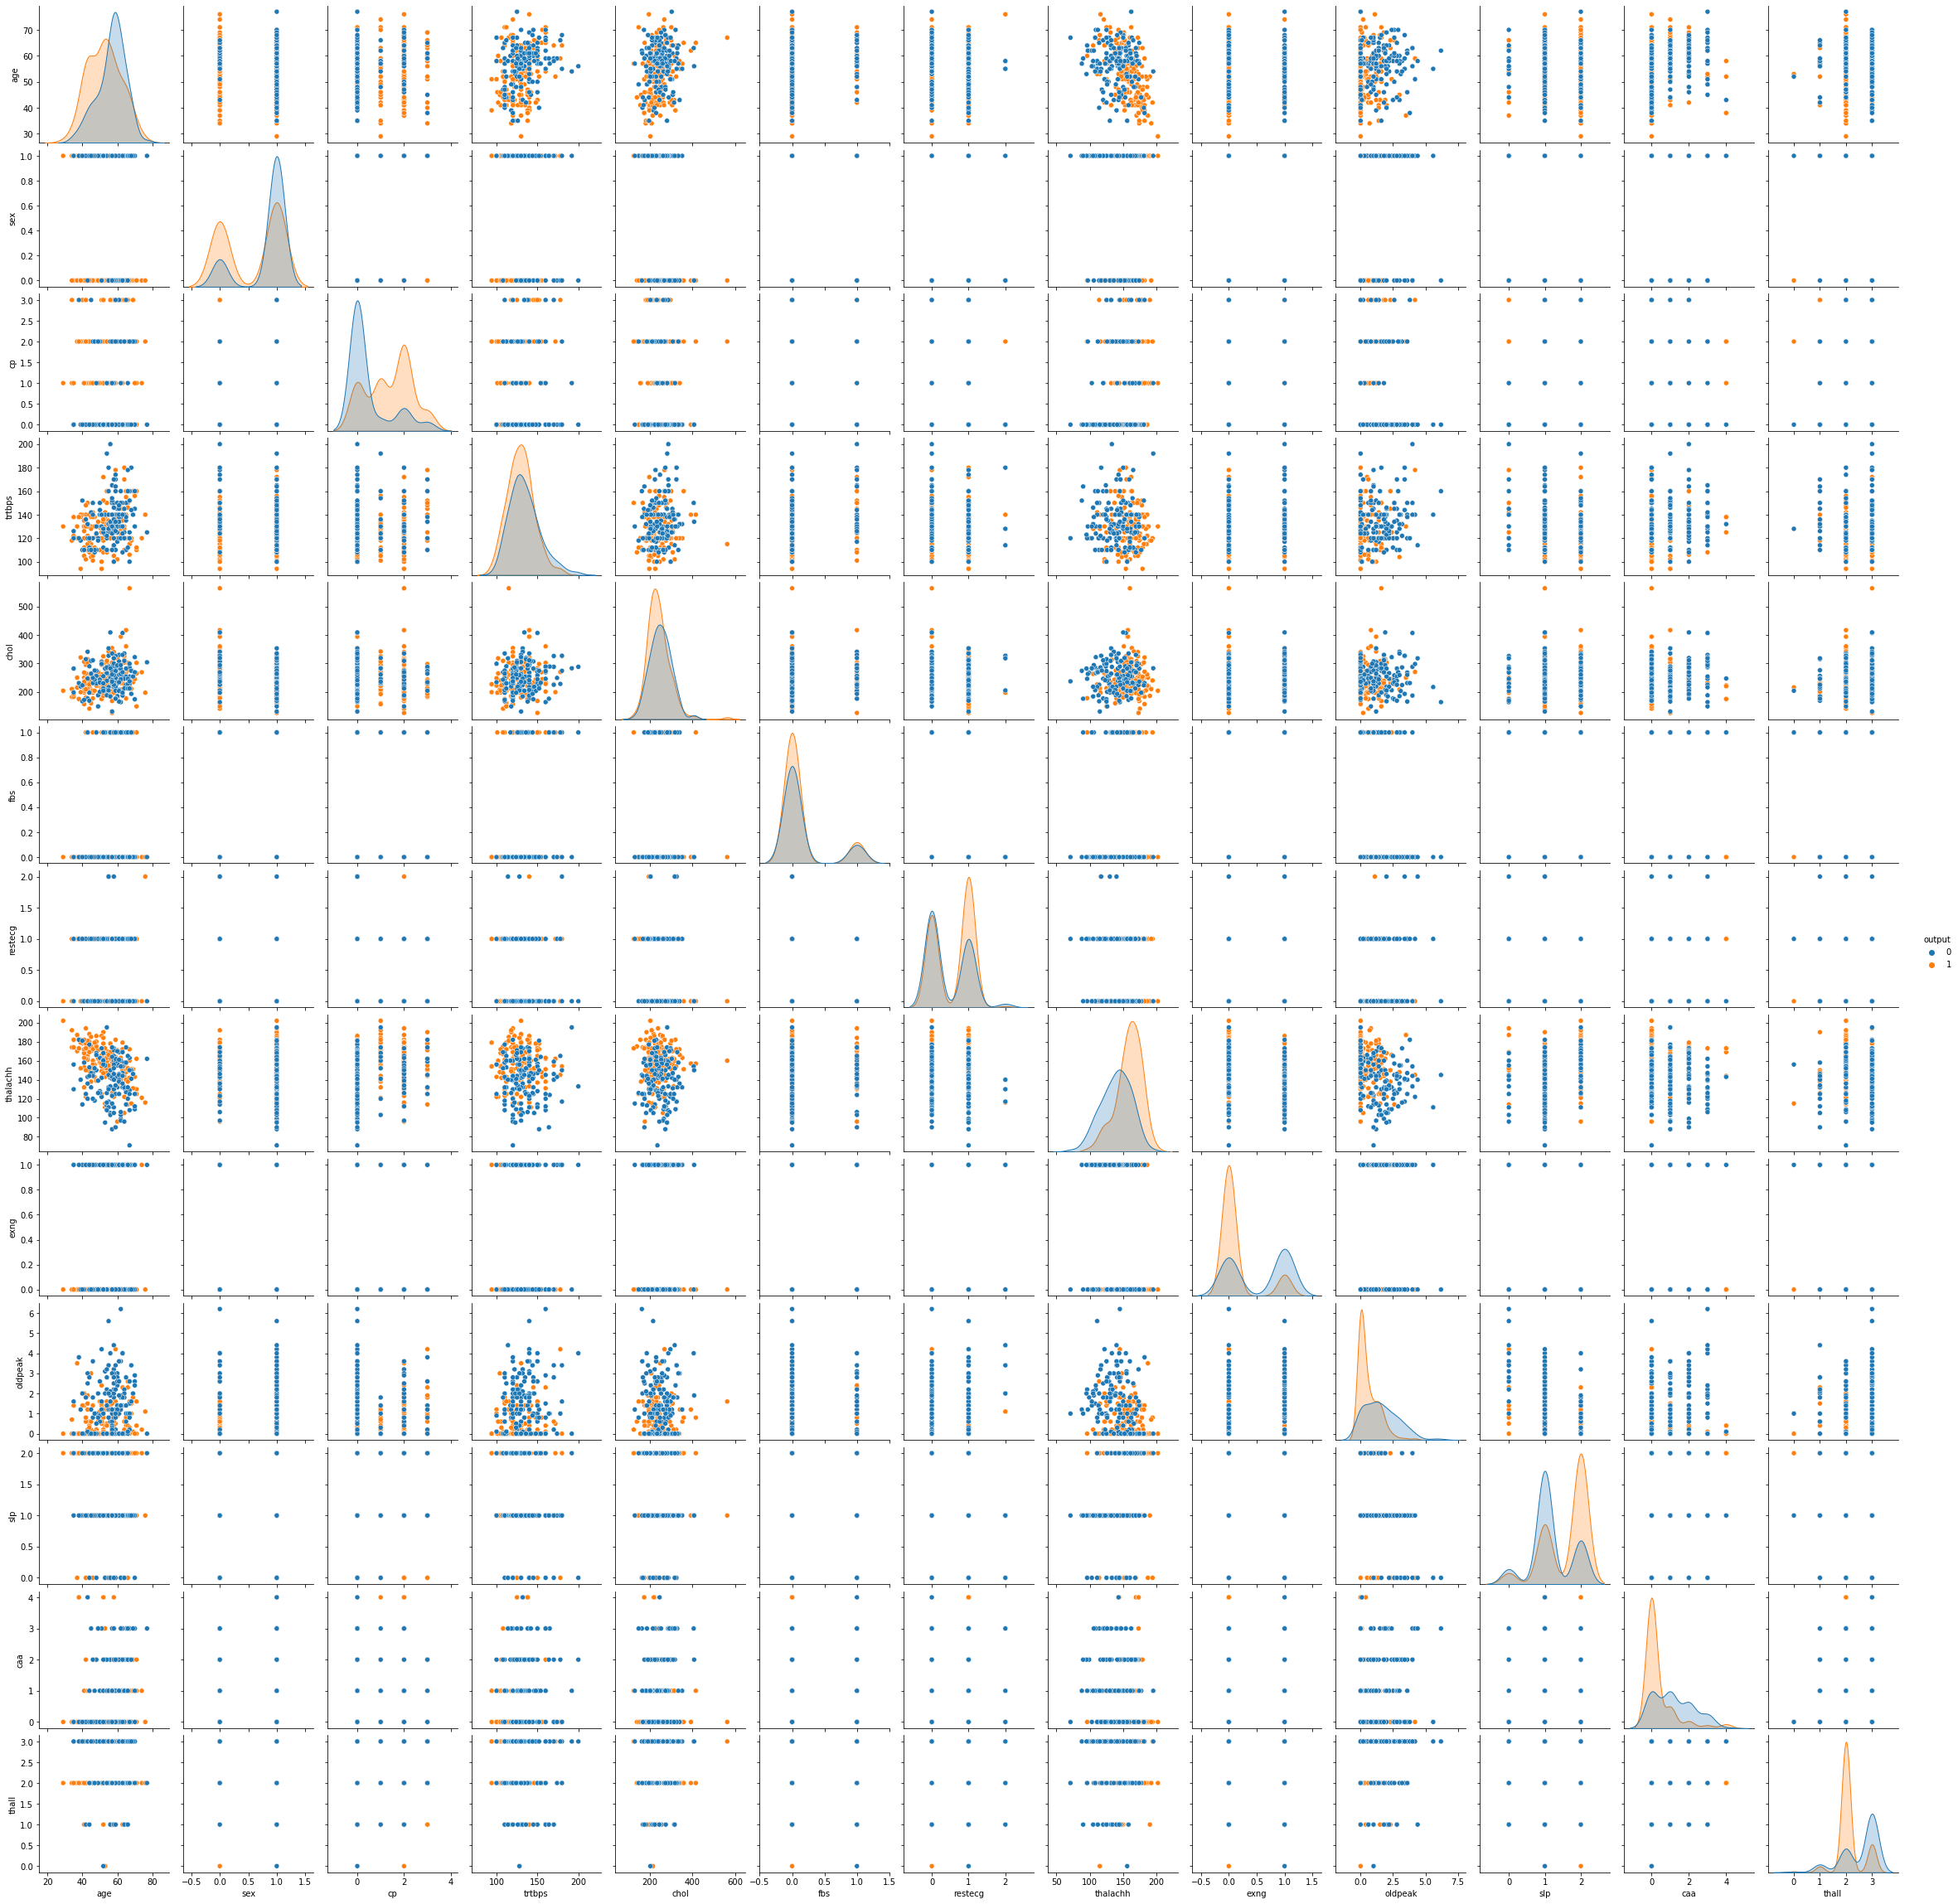

In [24]:
sns.pairplot(heart,hue='output')

1) The population of non-anginal pain has more than 50% population who suffered heart attack, and also the asymtomatic population too has 50% people who suffered heart attack. We can say that it is not necessary that heart attack will come to the people with trigger warning of symptioms. It is necessary to do health checkup as per doctore's recommendation.

2) The people those who have cholestrol level beyond 350 mg/dl are more suspetible to get the heart attack.Age does'nt have any relation to heart attack,it depend upon other factors too. so, it will be not correct to say that people with more age has higher chances of heart attack . yes the chances will be more if cholestrol level surpasses the normal cholestrol level.

3) exng has been seen as high in most of the age groups but they weren't suffered with heart attack,so we cannot say that the anginal pain due to exercise could be the reason for heart attack  ,but it could become one of the reason in certain rare cases as per the graph.

4) The sex 1 is more prone to thallium stress as compared to sex 0 and seems more suscpetible to heart attack.we can say that thallium stress value in between 2 and 2.5 increase the chances of heart attack whereas  for sex 0  the thall stress value is 2. overall excluding sex thall stress result with value 2 are more susceptible to heart attack. 

5) old peak value below 1.8 approximately shows higher chances of heart attack

6) maximum heartbeat number decreases with increase in age ,  decrease in max heart rate with an increase in age is not a good sign for the heart. 

7) restcg with value 2 has high chances of heart attack.

DATA PREPROCESSING

HANDLING OUTLIERS

<AxesSubplot:>

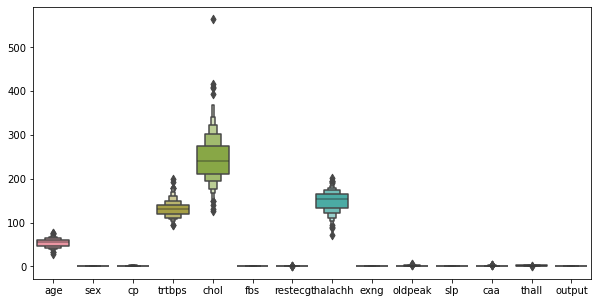

In [26]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=heart)

In [27]:
# Calculating z-score
z_score = (heart - np.mean(heart)/np.std(heart))
z_score

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57.004001,-0.468418,2.061485,137.482585,228.240829,0.582365,-1.005832,143.455867,-0.696631,1.403138,-2.274579,-0.714429,-2.784824,-0.093459
1,31.004001,-0.468418,1.061485,122.482585,245.240829,-0.417635,-0.005832,180.455867,-0.696631,2.603138,-2.274579,-0.714429,-1.784824,-0.093459
2,35.004001,-1.468418,0.061485,122.482585,199.240829,-0.417635,-1.005832,165.455867,-0.696631,0.503138,-0.274579,-0.714429,-1.784824,-0.093459
3,50.004001,-0.468418,0.061485,112.482585,231.240829,-0.417635,-0.005832,171.455867,-0.696631,-0.096862,-0.274579,-0.714429,-1.784824,-0.093459
4,51.004001,-1.468418,-0.938515,112.482585,349.240829,-0.417635,-0.005832,156.455867,0.303369,-0.296862,-0.274579,-0.714429,-1.784824,-0.093459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,51.004001,-1.468418,-0.938515,132.482585,236.240829,-0.417635,-0.005832,116.455867,0.303369,-0.696862,-1.274579,-0.714429,-0.784824,-1.093459
299,39.004001,-0.468418,2.061485,102.482585,259.240829,-0.417635,-0.005832,125.455867,-0.696631,0.303138,-1.274579,-0.714429,-0.784824,-1.093459
300,62.004001,-0.468418,-0.938515,136.482585,188.240829,0.582365,-0.005832,134.455867,-0.696631,2.503138,-1.274579,1.285571,-0.784824,-1.093459
301,51.004001,-0.468418,-0.938515,122.482585,126.240829,-0.417635,-0.005832,108.455867,0.303369,0.303138,-1.274579,0.285571,-0.784824,-1.093459


In [29]:
outliers_indices =np.where((z_score<-3)|(z_score>3))[0]

In [30]:
outliers_indices

array([  0,   0,   0, ..., 302, 302, 302], dtype=int64)

##### we have less no. of observation in this scenario so if we are thinking of removing outlier then this could result in loss of huge amount of data.

SCALING

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [33]:
X = heart.drop(['output'],axis=1)
Y = heart['output']

In [34]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
x_scaled = scaler.fit_transform(X)

In [36]:
x_scaled

array([[ 0.59259259,  0.        ,  1.        , ..., -1.        ,
         0.        , -1.        ],
       [-1.33333333,  0.        ,  0.5       , ..., -1.        ,
         0.        ,  0.        ],
       [-1.03703704, -1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96296296,  0.        , -0.5       , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.14814815,  0.        , -0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.14814815, -1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [37]:
from sklearn.model_selection import train_test_split

SPLITTING THE DATASET

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,Y,test_size=0.3,random_state=21)

PREDICTIVE MODELLING

In [39]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report

from sklearn.model_selection import cross_val_score,GridSearchCV

SVM

In [40]:
svm =SVC()

In [41]:
svm.fit(xtrain,ytrain)

SVC()

In [42]:
y_predictions =  svm.predict(xtest)

In [43]:
print(accuracy_score(ytest,y_predictions))

0.8571428571428571


In [44]:
print(classification_report(ytest,y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        43
           1       0.83      0.92      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



In [45]:
confusion_matrix(y_predictions,ytest)

array([[34,  4],
       [ 9, 44]], dtype=int64)

13 incorrect predictions

In [46]:
parameters = {'C': np.arange(1,100,1), 'gamma':np.arange(0.5,100,1)}

In [47]:
GridSearchCV_ = GridSearchCV(svm,parameters)

In [48]:
GridSearchCV_.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'gamma':...
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
       44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
       55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
       66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
       77.5, 78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5,
       88.5, 89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5, 98.5,
       99.5])})

In [49]:
y_predictions=GridSearchCV_.predict(xtest)

In [50]:
print(accuracy_score(y_predictions,ytest))

0.7692307692307693


In [51]:
print(classification_report(y_predictions,ytest))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        48
           1       0.73      0.81      0.77        43

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



In [76]:
confusion_matrix(y_predictions,ytest)

array([[35, 13],
       [ 8, 35]], dtype=int64)

21 incorrect predictions

Hypertuning doesn't helping much

LOGISTIC REGRESSION

In [53]:
Log_reg = LogisticRegression()
Log_reg.fit(xtrain,ytrain)
ypredict_log=Log_reg.predict(xtest)

In [54]:
accuracy_score(ypredict_log,ytest)

0.8241758241758241

In [55]:
confusion_matrix(ypredict_log,ytest)

array([[36,  9],
       [ 7, 39]], dtype=int64)

16 incorrect predictions

TREE MODELS

DECISION TREE

In [56]:
desc_tree = DecisionTreeClassifier()

In [57]:
desc_tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [58]:
y_prediction_dt=desc_tree.predict(xtest)

In [59]:
accuracy_score(ytest,y_prediction_dt)

0.7692307692307693

In [60]:
confusion_matrix(y_prediction_dt,ytest)

array([[36, 14],
       [ 7, 34]], dtype=int64)

21 incorrect predictions

RANDOM FOREST

In [61]:
rand_f = RandomForestClassifier()
rand_f.fit(xtrain,ytrain)

RandomForestClassifier()

In [62]:
y_pred_rf = rand_f.predict(xtest)

In [63]:
accuracy_score(y_pred_rf,ytest)

0.8131868131868132

In [64]:
confusion_matrix(y_pred_rf,ytest)

array([[37, 11],
       [ 6, 37]], dtype=int64)

17 incorrect predictions

GRADIENT BOOSTING CLASSIFIER

In [65]:
gbc = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

In [66]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=1, max_features=0.2, n_estimators=300,
                           random_state=42, subsample=0.8)

In [67]:
y_prediction_gbc = gbc.predict(xtest)

In [68]:
accuracy_score(y_prediction_gbc,ytest)

0.8351648351648352

In [77]:
confusion_matrix(y_prediction_gbc,ytest)

array([[39, 11],
       [ 4, 37]], dtype=int64)

15 incorrect predictions

Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
naive_bayes = GaussianNB()

In [72]:
naive_bayes.fit(xtrain,ytrain)

GaussianNB()

In [73]:
naive_bayes_prediction = naive_bayes.predict(xtest)

In [74]:
confusion_matrix(naive_bayes_prediction,ytest)

array([[37, 11],
       [ 6, 37]], dtype=int64)

In [75]:
accuracy_score(naive_bayes_prediction,ytest)

0.8131868131868132

17 incorrect predictions

##### I found SVM without hypertuning a good algorithm for this dataset with accuracy 85.71 %